In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1 Importing Libraries

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

from sklearn import preprocessing
from sklearn import utils


# 2. Reading data

In [45]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/pubg_train.csv', nrows=400000)

In [46]:
train.head(5)

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0.0,0.0,0,0,0,...,0,0.0000,0,0.00,0.0,0,244.80,1,1466,0.4443
1,1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0.0,91.5,0,0,0,...,0,0.0045,0,11.04,0.0,0,1434.00,5,0,0.6400
2,2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0.0,68.0,0,0,0,...,0,0.0000,0,0.00,0.0,0,161.80,2,0,0.7754
3,3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0.0,32.9,0,0,0,...,0,0.0000,0,0.00,0.0,0,202.80,3,0,0.1667
4,4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0.0,100.0,0,0,0,...,0,0.0000,0,0.00,0.0,0,49.75,2,0,0.1875


In [47]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,400000.0,199999.500000,115470.198175,0.0,99999.75,199999.5000,299999.2500,399999.0
assists,400000.0,0.231783,0.587333,0.0,0.00,0.0000,0.0000,21.0
boosts,399415.0,1.107159,1.715460,0.0,0.00,0.0000,2.0000,21.0
damageDealt,400000.0,130.562706,170.960496,0.0,0.00,84.1000,185.4000,6616.0
DBNOs,400000.0,0.656312,1.144421,0.0,0.00,0.0000,1.0000,32.0
headshotKills,400000.0,0.226155,0.598289,0.0,0.00,0.0000,0.0000,40.0
heals,400000.0,1.366593,2.670600,0.0,0.00,0.0000,2.0000,52.0
killPlace,400000.0,47.622085,27.453277,1.0,24.00,47.0000,71.0000,100.0
killPoints,399876.0,507.344304,627.722767,0.0,0.00,0.0000,1173.0000,2152.0
kills,400000.0,0.923972,1.556451,0.0,0.00,0.0000,1.0000,65.0


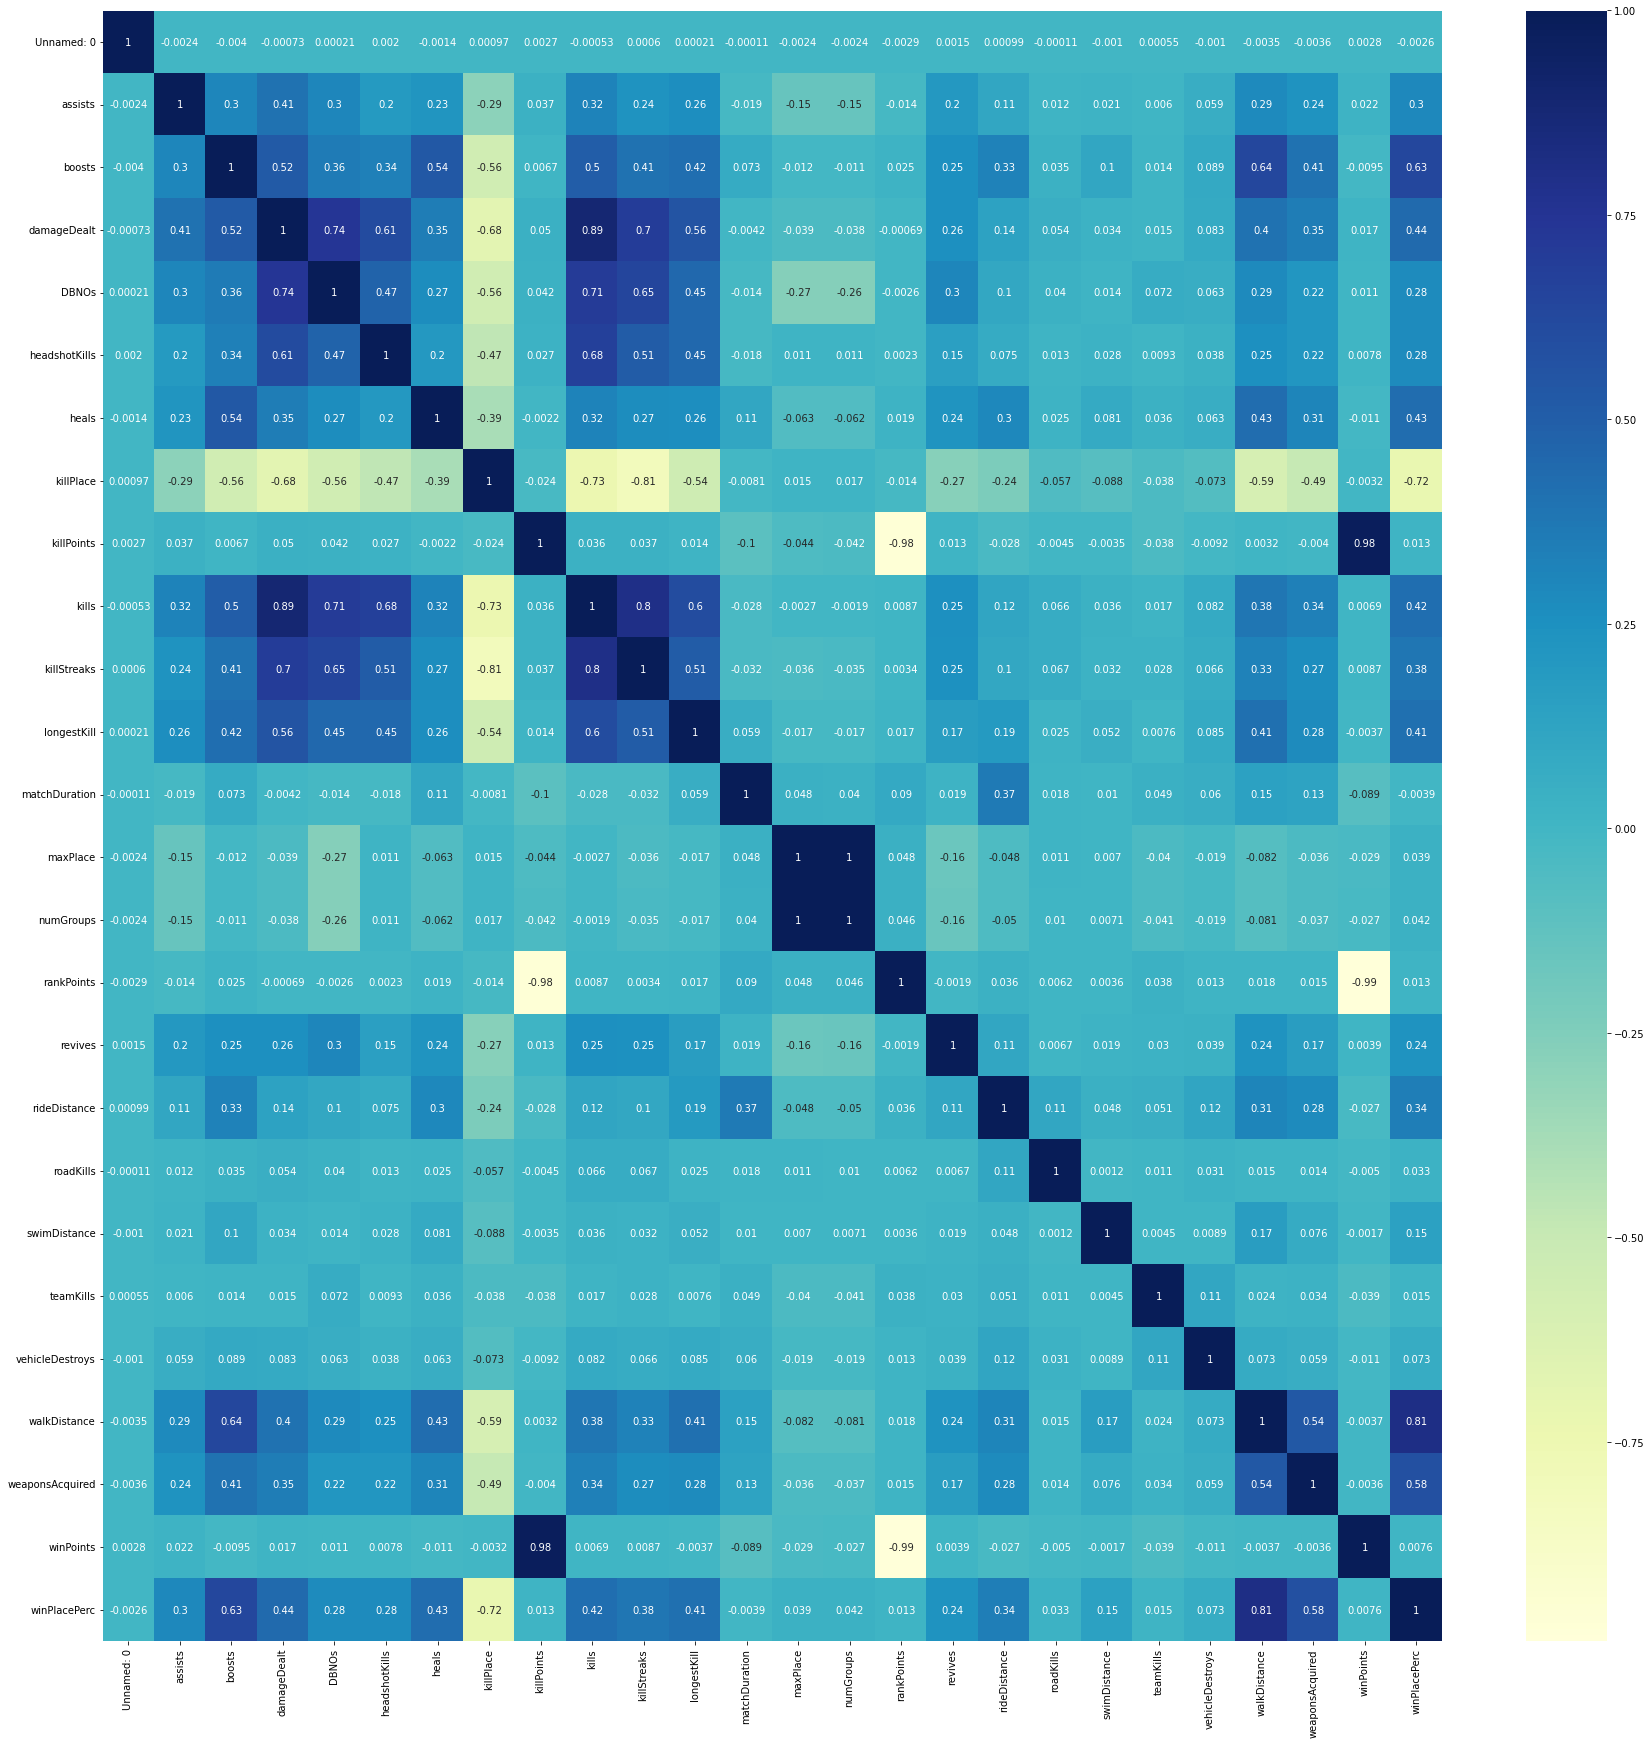

In [63]:
plt.figure(figsize=(30,30))
dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)

# 3. Data Exploration

Text(0.5, 1.0, 'Kills')

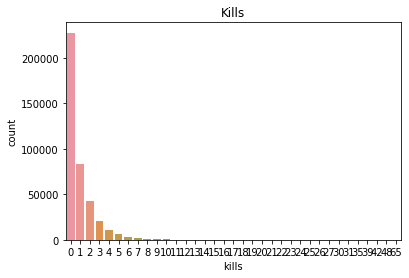

In [64]:
sns.countplot(train['kills']).set_title("Kills")

In [9]:
train['kills'].quantile(0.99)
#99% of people have 7.0 kills or less

7.0

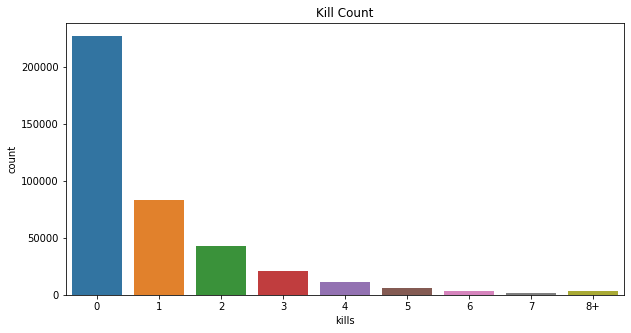

In [10]:
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(10,5))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count")
plt.show()

In [11]:
# People winning without a single kill
print(len(data[data['winPlacePerc']==1]))
print(f"{100*len(data[data['winPlacePerc']==1])/len(train)}\n")

data1 = train[train['damageDealt'] == 0].copy()

#people winning without any damage
print(len(data1[data1['winPlacePerc']==1]))
print(f"{100*len(data1[data1['winPlacePerc']==1])/len(train)}")

10078
2.5195

425
0.10625


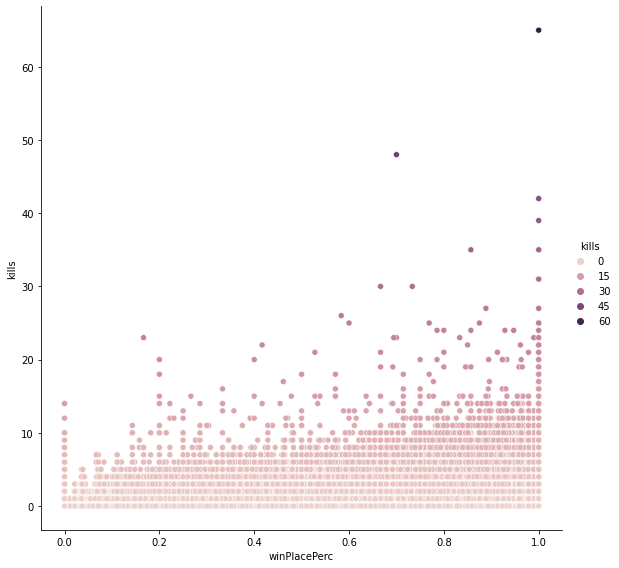

In [12]:
sns.relplot(x="winPlacePerc", y="kills", data=train,hue='kills',height=8)
plt.show()

# Identifying cheating players

In [65]:
# Create headshot_rate feature
train['headshotRate'] = train['headshotKills'] / train['kills']
train['headshotRate'] = train['headshotRate'].fillna(0)

In [66]:
# Create feature killsWithoutMoving
train['killsWithoutMoving'] = ((train['kills'] > 0) & ( (train['rideDistance'] + train['walkDistance'] + train['swimDistance']) == 0))

In [67]:
# Check players who kills without moving
print(len(train[train['killsWithoutMoving'] == True]))
train[train['killsWithoutMoving'] == True].head()

147


,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshotRate,killsWithoutMoving
1824,1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0.0,593.0,0,0,3,...,0,0.0,0.0,0,0.0,8,0,0.8570,0.0,True
6673,6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0.0,346.5,0,0,6,...,0,0.0,0.0,0,0.0,22,0,0.6000,0.0,True
11892,11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0.0,1750.0,0,4,5,...,0,0.0,0.0,0,0.0,13,0,0.8945,0.2,True
14631,14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0.0,157.8,0,0,0,...,0,0.0,0.0,0,0.0,7,1500,0.0000,0.0,True
15591,15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0.0,100.0,0,1,0,...,0,0.0,0.0,0,0.0,10,0,0.3000,1.0,True


In [68]:
# Remove outliers
train.drop(train[train['killsWithoutMoving'] == True].index, inplace=True)

If the player managed to get kills without moving, we are considering that as cheating.

In [69]:
# Players who got more than 10 roadKills
print(len(train[train['roadKills'] > 6]))

3


In [70]:
# Drop roadKill 'cheaters'
train.drop(train[train['roadKills'] > 6].index)

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshotRate,killsWithoutMoving
0,0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0.0,0.000,0,0,0,...,0,0.00,0.0,0,244.80,1,1466,0.4443,0.0,False
1,1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0.0,91.500,0,0,0,...,0,11.04,0.0,0,1434.00,5,0,0.6400,0.0,False
2,2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0.0,68.000,0,0,0,...,0,0.00,0.0,0,161.80,2,0,0.7754,0.0,False
3,3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0.0,32.900,0,0,0,...,0,0.00,0.0,0,202.80,3,0,0.1667,0.0,False
4,4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0.0,100.000,0,0,0,...,0,0.00,0.0,0,49.75,2,0,0.1875,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,399995,550cd6bc216e1f,dcc147df50173b,ac9ab4a9d49952,0,1.0,162.800,2,0,2,...,0,0.00,0.0,0,1101.00,6,1473,0.7144,0.0,False
399996,399996,b8af1cf0fbc266,974978e351c446,295cf6579ddebe,0,0.0,0.000,0,0,1,...,0,0.00,0.0,0,137.00,3,0,0.0000,0.0,False
399997,399997,81b0af9b460835,7c15fc55748ce6,508a8f0cbab640,0,3.0,242.900,0,0,1,...,0,0.00,0.0,0,952.50,3,0,0.4895,0.0,False
399998,399998,d417d2c8576b6e,5e00ff664a0c63,d7fe00bafda036,0,1.0,100.000,1,0,1,...,0,18.03,0.0,0,1974.00,3,1488,0.7500,0.0,False


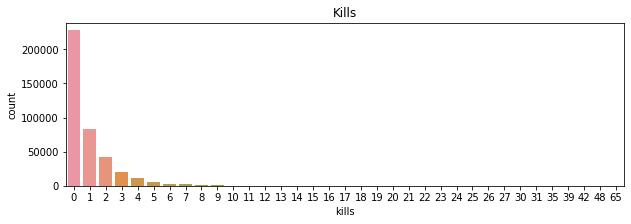

In [71]:
# Plot the distribution of kills
plt.figure(figsize=(10,3))
sns.countplot(data=train, x=train['kills']).set_title('Kills')
plt.show()

In [72]:
# Players who got more than 30 kills
print(len(train[train['kills'] > 30]))
train[train['kills'] > 30].head()

7


,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshotRate,killsWithoutMoving
57978,57978,9d8253e21ccbbd,ef7135ed856cd8,37f05e2a01015f,9,0.0,3724.0,0,7,0,...,0,0.0,0.0,0,48.8,48,1500,0.857,0.200000,False
87793,87793,45f76442384931,b3627758941d34,37f05e2a01015f,8,0.0,3088.0,0,8,27,...,0,0.0,0.0,0,780.5,45,1500,1.000,0.258065,False
156599,156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0.0,5480.0,0,12,7,...,0,0.0,0.0,0,23.7,61,0,0.700,0.250000,False
160254,160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0.0,4032.0,0,40,0,...,0,0.0,1.0,0,718.5,16,1500,1.000,0.952381,False
180189,180189,1355613d43e2d0,f863cd38c61dbf,39c442628f5df5,5,0.0,3172.0,0,6,15,...,0,0.0,0.0,0,71.5,41,0,1.000,0.171429,False


In [73]:
# Removing outliers
train.drop(train[train['kills'] > 30].index)

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshotRate,killsWithoutMoving
0,0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0.0,0.000,0,0,0,...,0,0.00,0.0,0,244.80,1,1466,0.4443,0.0,False
1,1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0.0,91.500,0,0,0,...,0,11.04,0.0,0,1434.00,5,0,0.6400,0.0,False
2,2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0.0,68.000,0,0,0,...,0,0.00,0.0,0,161.80,2,0,0.7754,0.0,False
3,3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0.0,32.900,0,0,0,...,0,0.00,0.0,0,202.80,3,0,0.1667,0.0,False
4,4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0.0,100.000,0,0,0,...,0,0.00,0.0,0,49.75,2,0,0.1875,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,399995,550cd6bc216e1f,dcc147df50173b,ac9ab4a9d49952,0,1.0,162.800,2,0,2,...,0,0.00,0.0,0,1101.00,6,1473,0.7144,0.0,False
399996,399996,b8af1cf0fbc266,974978e351c446,295cf6579ddebe,0,0.0,0.000,0,0,1,...,0,0.00,0.0,0,137.00,3,0,0.0000,0.0,False
399997,399997,81b0af9b460835,7c15fc55748ce6,508a8f0cbab640,0,3.0,242.900,0,0,1,...,0,0.00,0.0,0,952.50,3,0,0.4895,0.0,False
399998,399998,d417d2c8576b6e,5e00ff664a0c63,d7fe00bafda036,0,1.0,100.000,1,0,1,...,0,18.03,0.0,0,1974.00,3,1488,0.7500,0.0,False


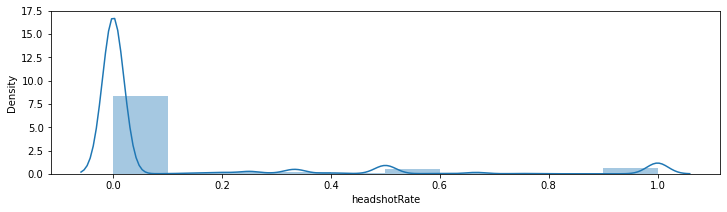

In [74]:
# Plot the distribution of headshot_rate
plt.figure(figsize=(12,3))
sns.distplot(train['headshotRate'], bins=10)
plt.show()

In [75]:
# Players who made a minimum of 8 kills and have a headshot_rate of 100%
print(len(train[(train['headshotRate'] == 1) & (train['kills'] > 8)]))
train[(train['headshotRate'] == 1) & (train['kills'] > 8)].head()

2


,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshotRate,killsWithoutMoving
281570,281570,ab9d7168570927,add05ebde0214c,e016a873339c7b,2,3.0,1212.0,8,10,0,...,0,0.0,0.0,0,2940.0,5,0,0.846,1.0,False
346124,346124,044d18fc42fc75,fc1dbc2df6a887,628107d4c41084,3,5.0,1620.0,13,11,3,...,0,0.0,0.0,0,3422.0,8,1560,1.000,1.0,False


In [76]:
train.drop(train[(train['headshotRate'] == 1) & (train['kills'] > 8)].index)

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshotRate,killsWithoutMoving
0,0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0.0,0.000,0,0,0,...,0,0.00,0.0,0,244.80,1,1466,0.4443,0.0,False
1,1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0.0,91.500,0,0,0,...,0,11.04,0.0,0,1434.00,5,0,0.6400,0.0,False
2,2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0.0,68.000,0,0,0,...,0,0.00,0.0,0,161.80,2,0,0.7754,0.0,False
3,3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0.0,32.900,0,0,0,...,0,0.00,0.0,0,202.80,3,0,0.1667,0.0,False
4,4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0.0,100.000,0,0,0,...,0,0.00,0.0,0,49.75,2,0,0.1875,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,399995,550cd6bc216e1f,dcc147df50173b,ac9ab4a9d49952,0,1.0,162.800,2,0,2,...,0,0.00,0.0,0,1101.00,6,1473,0.7144,0.0,False
399996,399996,b8af1cf0fbc266,974978e351c446,295cf6579ddebe,0,0.0,0.000,0,0,1,...,0,0.00,0.0,0,137.00,3,0,0.0000,0.0,False
399997,399997,81b0af9b460835,7c15fc55748ce6,508a8f0cbab640,0,3.0,242.900,0,0,1,...,0,0.00,0.0,0,952.50,3,0,0.4895,0.0,False
399998,399998,d417d2c8576b6e,5e00ff664a0c63,d7fe00bafda036,0,1.0,100.000,1,0,1,...,0,18.03,0.0,0,1974.00,3,1488,0.7500,0.0,False


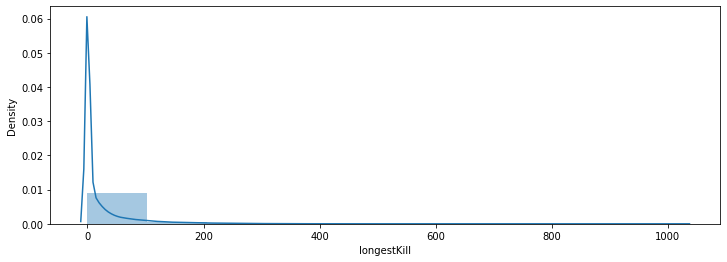

In [77]:
# Plot the distribution of longestKill
plt.figure(figsize=(12,4))
sns.distplot(train['longestKill'], bins=10)
plt.show()

In [78]:
# Check out players who made kills with a distance of more than 1 km
display(train[train['longestKill'] >= 1000].shape)
train[train['longestKill'] >= 1000].head(10)

(4, 32)

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshotRate,killsWithoutMoving
195021,195021,f141f7e776138b,a0fa42bf37e9f0,0b4c9543bc9199,1,4.0,784.0,5,4,5,...,0,0.0,0.0,0,3678.00,5,1523,0.8486,1.000000,False
202281,202281,88e2af7d78af5a,34ddeede52c042,4346bc63bc67fa,0,3.0,784.0,5,1,1,...,0,0.0,0.0,1,3052.00,9,0,0.9233,0.250000,False
240005,240005,41c2f5c0699807,9faecf87ab4275,634edab75860b3,5,0.0,1284.0,8,5,7,...,0,0.0,0.0,0,48.88,38,1500,0.5386,0.454545,False
324313,324313,ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0.0,1028.0,0,0,0,...,0,0.0,0.0,0,1264.00,26,0,1.0000,0.000000,False


In [79]:
# Removing outliers
train.drop(train[train['longestKill'] >= 1000].index, inplace=True)

## walkDistance

In [80]:
#99% of people have walked this distance or less
print(train['walkDistance'].quantile(0.99))

4390.0


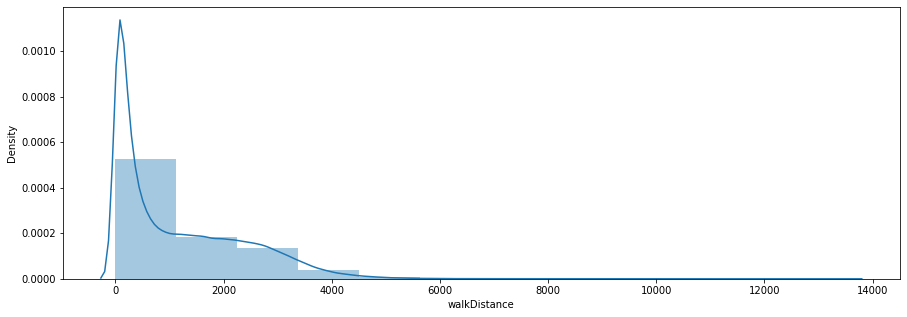

In [81]:
# Plotting the distribution of walkDistance
plt.figure(figsize=(15,5))
sns.distplot(train['walkDistance'], bins=12)
plt.show()

In [40]:
print(len(data[data['walkDistance'] == 0]))
#These people die before even taking a step

8801


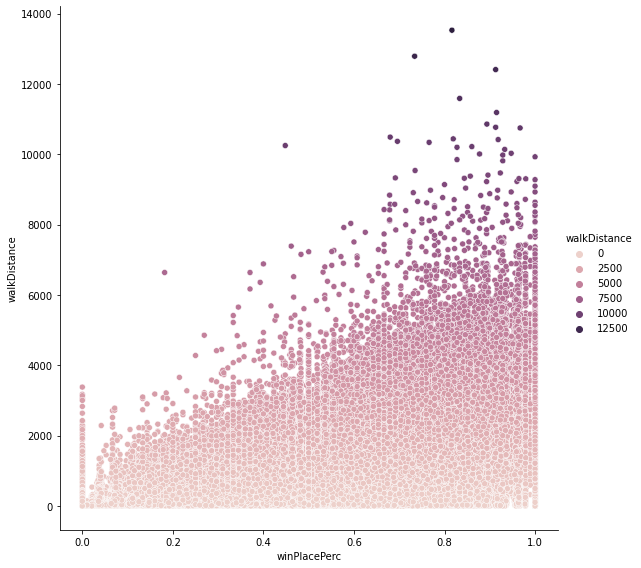

In [82]:
sns.relplot(x="winPlacePerc", y="walkDistance",  data=train,hue="walkDistance", height=8)
plt.show()

Apparently walking has a high correlation with winPlacePerc.

In [85]:
# walkDistance outliers
print(len(train[train['walkDistance'] >= 10000]))
train[train['walkDistance'] >= 10000].head()

19


,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshotRate,killsWithoutMoving
23026,23026,8a6562381dd83f,23e638cd6eaf77,b0a804a610e9b0,0,1.0,0.00,0,0,0,...,0,9.88,0.0,0,13530.0,7,0,0.8164,0.0,False
34344,34344,5a591ecc957393,6717370b51c247,a15d93e7165b05,0,3.0,23.22,0,0,1,...,0,40.88,0.0,0,10030.0,7,1533,0.9473,0.0,False
49312,49312,582685f487f0b4,338112cd12f1e7,d0afbf5c3a6dc9,0,4.0,117.20,1,0,1,...,0,36.75,0.0,0,12410.0,3,0,0.9130,0.0,False
68590,68590,8c0d9dd0b4463c,c963553dc937e9,926681ea721a47,0,1.0,32.34,0,0,1,...,0,45.80,0.0,0,11590.0,3,1563,0.8335,0.0,False
94400,94400,d441bebd01db61,7e179b3366adb8,923b57b8b834cc,1,1.0,73.06,0,0,3,...,0,45.62,0.0,0,10440.0,6,1488,0.8193,0.0,False


In [86]:
# Remove outliers
train.drop(train[train['walkDistance'] >= 10000].index, inplace=True)

## 3.3 rideDistance

In [88]:
#99% of people have drived 6924.0m or less
print(train['rideDistance'].quantile(0.99))

6924.0


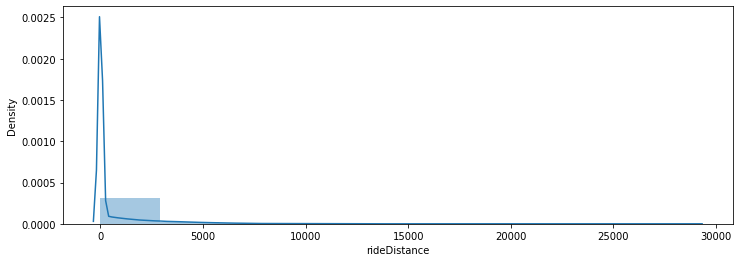

In [89]:
# Plot the distribution of rideDistance
plt.figure(figsize=(12,4))
sns.distplot(train['rideDistance'], bins=10)
plt.show()

In [91]:
#drived for 0 meters.
print(len(data[data['rideDistance'] == 0]))
print(100*len(data1[data1['rideDistance']==0])/len(train),"%")

295957
23.175099417252333 %


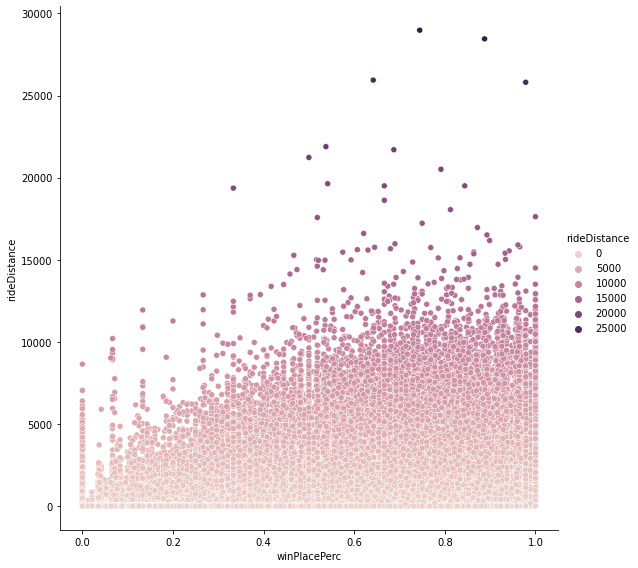

In [92]:
sns.relplot(x="winPlacePerc", y="rideDistance", data=train,hue="rideDistance", height=8)
plt.show()

There is a small correlation between rideDistance and winPlacePerc.

In [96]:
# rideDistance anomalies
print(len(train[train['rideDistance'] >= 25000]))
train[train['rideDistance'] >= 25000].head(10)

4


,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshotRate,killsWithoutMoving
28588,28588,6260f7c49dc16f,b24589f02eedd7,6ebea3b4f55b4a,0,0.0,99.2,0,0,1,...,0,0.0,0.0,0,376.5,6,0,0.6420,0.000000,False
70507,70507,ca6fa339064d67,f7bb2e30c3461f,3bfd8d66edbeff,0,0.0,100.0,0,0,0,...,1,0.0,0.0,0,467.5,3,0,0.8877,0.000000,False
95276,95276,c3fabfce7589ae,15529e25aa4a74,d055504340e5f4,0,7.0,778.0,0,1,2,...,2,0.0,0.0,0,923.0,6,0,0.9785,0.142857,False
297186,297186,88904c200175b6,012a61a01e146e,7a270c25e9b70c,0,1.0,0.0,0,0,1,...,0,0.0,0.0,0,297.2,3,0,0.7446,0.000000,False


In [97]:
# Remove outliers
train.drop(train[train['rideDistance'] >= 25000].index, inplace=True)

## swimDistance

In [98]:
print(train['swimDistance'].quantile(0.99))
#The average person swims

122.5


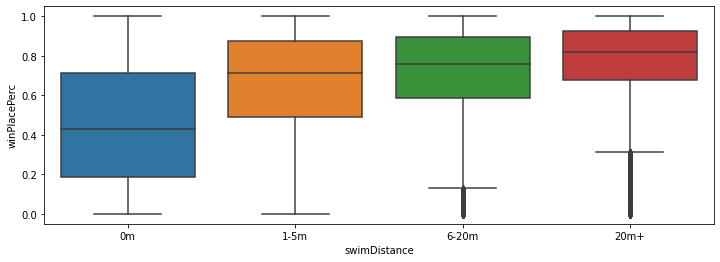

In [99]:
swim = train.copy()

swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0, 5, 20, 5286], labels=['0m','1-5m', '6-20m', '20m+'])

plt.figure(figsize=(12,4))
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim)
plt.show()

It seems that if you swim, you rise to the top. In PUBG there are currently 3 maps.

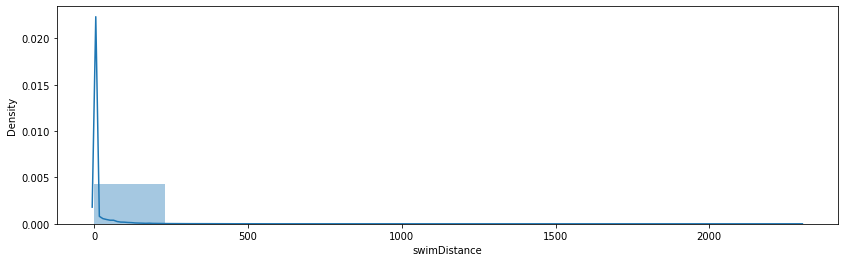

In [101]:
plt.figure(figsize=(14,4))
sns.distplot(train['swimDistance'], bins=10)
plt.show()

<h4><font color='green'>3.4.1 Outliers

In [102]:
# Players who swam more than 2 km
train[train['swimDistance'] >= 2000]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshotRate,killsWithoutMoving
177973,177973,c2e9e5631f4e54,23213058f83abe,f01eb1073ef377,0,5.0,78.1,1,0,1,...,0,2296.0,0.0,0,1002.0,4,1466,0.959,0.0,False
274258,274258,ba5e3dfb5a0fa0,383db055216ec2,d6e13468e28ab4,0,4.0,53.3,0,0,16,...,0,2148.0,0.0,0,2276.0,5,0,0.960,0.0,False


In [103]:
# Remove outliers
train.drop(train[train['swimDistance'] >= 2000].index, inplace=True)

## heals & boost

In [104]:
print(train['heals'].quantile(0.99))

12.0


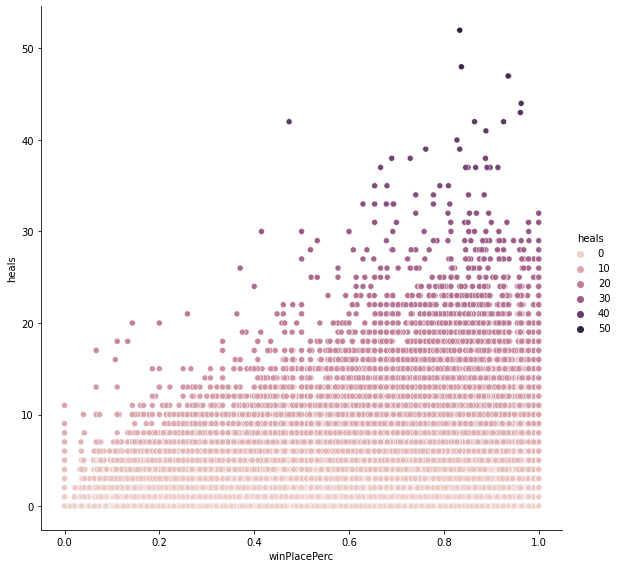

In [105]:
sns.relplot(x="winPlacePerc", y="heals", data=train,hue="heals" ,height=8)
plt.show()

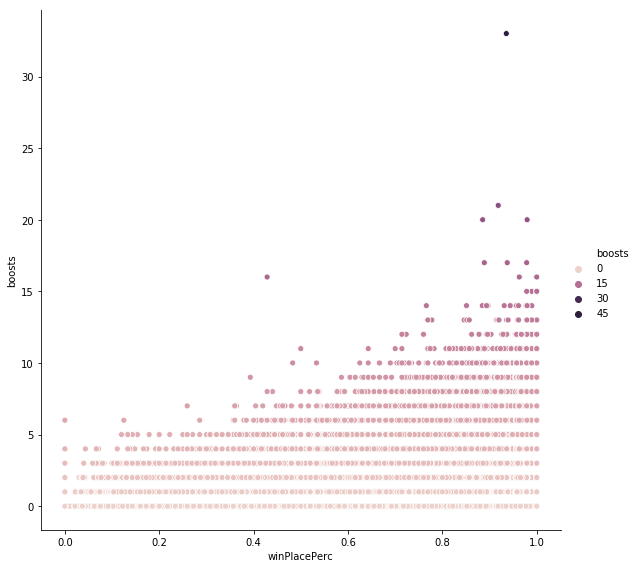

In [ ]:
sns.relplot(x="winPlacePerc", y="boosts", data=train,hue="boosts" ,height=8)
plt.show()

So healing and boosting, definitely are correlated with winPlacePerc. Boosting is more.

In [110]:
# 40 or more healing items used
print(len(train[train['boosts'] >= 20]))
train[train['boosts'] >= 20].head()

3


,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshotRate,killsWithoutMoving
59311,59311,250febb1876af9,0dd6baeb4d49c4,59c7587fd0a589,1,21.0,254.6,1,0,3,...,0,0.0,0.0,0,3196.0,5,1491,0.9185,0.0,False
143873,143873,8c6f0373ae4295,3ddd2279ed06dc,c540e9500fb8ac,0,20.0,452.5,1,0,1,...,0,0.0,0.0,0,2088.0,4,1556,0.9795,0.0,False
190700,190700,ab541f7b14c619,b6ea714ff6c1d1,a26a5d3214d2d8,0,20.0,0.0,0,0,5,...,0,0.0,0.0,0,2030.0,4,0,0.8853,0.0,False


In [111]:
# Remove outliers
train.drop(train[train['boosts'] >= 20].index, inplace=True)

<h4><font color='green'>3.5.2 Outliers

In [114]:
# 50 or more healing items used
print(len(train[train['heals'] >= 50]))
train[train['heals'] >= 50].head()

1


,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshotRate,killsWithoutMoving
126439,126439,c45bd6917146e2,81ab9f863957cb,4335664c6716fa,0,2.0,0.0,0,0,52,...,0,3.443,0.0,0,1340.0,3,1543,0.8335,0.0,False


In [115]:
# Remove outliers
train.drop(train[train['heals'] >= 50].index, inplace=True)

## Weapons

In [116]:
print(train['weaponsAcquired'].quantile(0.99))

10.0


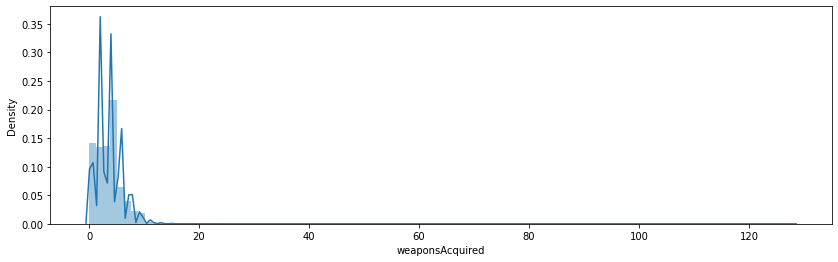

In [117]:
# Plot the distribution of weaponsAcquired
plt.figure(figsize=(14,4))
sns.distplot(train['weaponsAcquired'], bins=100)
plt.show()

In [119]:
len(data[data['weaponsAcquired'] == 0])

20244

<h4><font color='green'>3.6.1 Outliers

In [120]:
# Players who acquired more than 80 weapons
display(train[train['weaponsAcquired'] >= 80].shape)
train[train['weaponsAcquired'] >= 80].head()

(1, 32)

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshotRate,killsWithoutMoving
233643,233643,7c8c83f5f97d0f,b33b210a52a2f8,2e8a0917a71c43,0,0.0,67.1,0,0,0,...,0,0.0,0.0,0,1307.0,128,1577,0.711,0.0,False


In [ ]:
# Remove outliers
train.drop(train[train['weaponsAcquired'] >= 80].index, inplace=True)

## Solos, Duos and Squads

In [122]:
solos = train[train['numGroups']>50]
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)]
squads = train[train['numGroups']<=25]

print(len(solos), 100*len(solos)/len(train))

print(len(duos), 100*len(duos)/len(train))

print(len(squads), 100*len(squads)/len(train))

63696 15.931208872014587
296269 74.10078060322296
39699 9.929242982449558


## match type

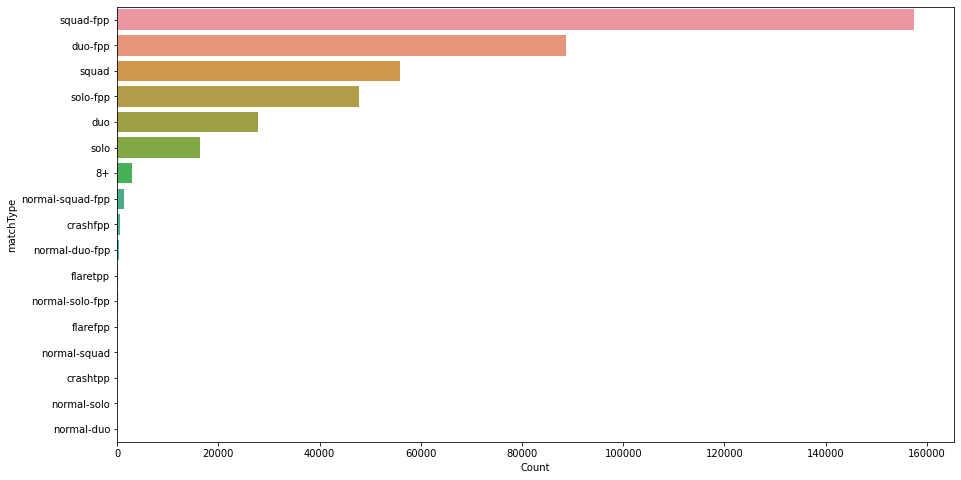

In [123]:
f,ax = plt.subplots(figsize=(15,8))
sns.barplot(data.matchType.value_counts().values,data.matchType.value_counts().index)
plt.xlabel('Count')
plt.ylabel('matchType')
plt.show()

In [124]:
# One hot encode matchType
train = pd.get_dummies(train, columns=['matchType'])

# Take a look at the encoding
matchType_encoding = train.filter(regex='matchType')
matchType_encoding.head()

,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [125]:
# Drop Id column, it isn't useful for our model

train.drop(columns=['groupId','Id', 'matchId'])

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0.0,0.000,0,0,0,60,1241.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0.0,91.500,0,0,0,57,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,1,0.0,68.000,0,0,0,47,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0.0,32.900,0,0,0,75,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0,0.0,100.000,0,0,0,45,0.0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,399995,0,1.0,162.800,2,0,2,26,993.0,1,...,0,0,0,0,0,0,0,0,0,1
399996,399996,0,0.0,0.000,0,0,1,89,0.0,0,...,0,0,0,0,0,0,0,0,1,0
399997,399997,0,3.0,242.900,0,0,1,33,0.0,1,...,0,0,0,0,0,0,0,0,0,0
399998,399998,0,1.0,100.000,1,0,1,30,1003.0,1,...,0,0,0,0,0,0,0,0,0,1


 - Added features to train so we need to remove

In [ ]:
train.drop(columns=['killsWithoutMoving', 'headshotRate'])

In [129]:
# Check dimensions of data
print(train.shape)

(399819, 45)


#Match Types

In [ ]:
print('There are {} different Match types in the dataset.'.format(train['matchType'].nunique()))

There are 16 different Match types in the dataset.


In [ ]:
train.matchType.value_counts()

squad-fpp           1755875
duo-fpp              996472
squad                626412
solo-fpp             536623
duo                  313534
solo                 181898
normal-squad-fpp      17172
crashfpp               6286
normal-duo-fpp         5488
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


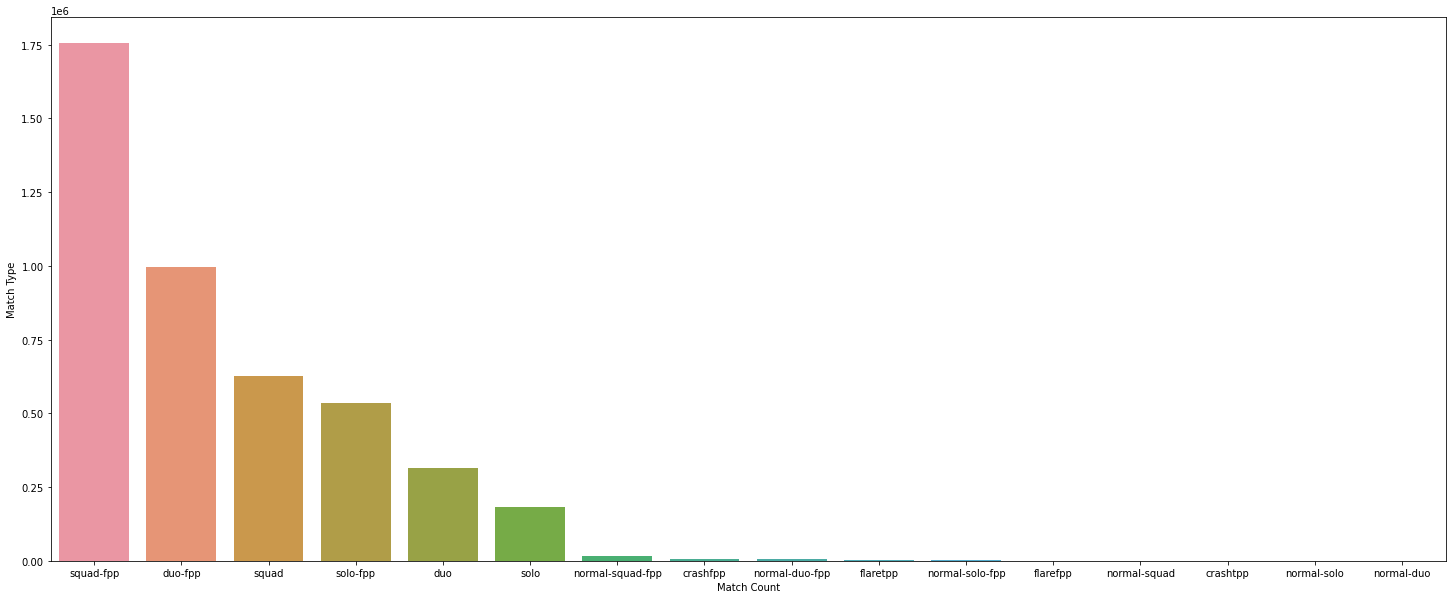

In [ ]:
f,ax = plt.subplots(figsize=(25,10))
sns.barplot(train.matchType.value_counts().index,train.matchType.value_counts().values)
plt.xlabel('Match Count')
plt.ylabel('Match Type')
plt.show()

In [ ]:
# One hot encode matchType
#train = pd.get_dummies(train, columns=['matchType'])
# Take a look at the encoding
#matchType_encoding = train.filter(regex='matchType')
#matchType_encoding.head()

,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#Decision Tree

In [ ]:
Train='/content/drive/MyDrive/data1 files/pubg_train.csv'
Test='/content/drive/MyDrive/data1 files/pubg_test.csv'
train=pd.read_csv(Train)
test=pd.read_csv(Test)

In [ ]:
data=train.copy()
data1=test.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 30 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   Id               object 
 2   groupId          object 
 3   matchId          object 
 4   assists          int64  
 5   boosts           float64
 6   damageDealt      float64
 7   DBNOs            int64  
 8   headshotKills    int64  
 9   heals            int64  
 10  killPlace        int64  
 11  killPoints       float64
 12  kills            int64  
 13  killStreaks      float64
 14  longestKill      float64
 15  matchDuration    int64  
 16  matchType        object 
 17  maxPlace         float64
 18  numGroups        float64
 19  rankPoints       int64  
 20  revives          int64  
 21  rideDistance     float64
 22  roadKills        int64  
 23  swimDistance     float64
 24  teamKills        float64
 25  vehicleDestroys  int64  
 26  walkDistance     float64
 27  weaponsAcqui

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934174 entries, 0 to 1934173
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   Id               object 
 2   groupId          object 
 3   matchId          object 
 4   assists          int64  
 5   boosts           float64
 6   damageDealt      float64
 7   DBNOs            int64  
 8   headshotKills    int64  
 9   heals            int64  
 10  killPlace        int64  
 11  killPoints       float64
 12  kills            int64  
 13  killStreaks      float64
 14  longestKill      float64
 15  matchDuration    int64  
 16  matchType        object 
 17  maxPlace         float64
 18  numGroups        float64
 19  rankPoints       int64  
 20  revives          int64  
 21  rideDistance     float64
 22  roadKills        int64  
 23  swimDistance     float64
 24  teamKills        float64
 25  vehicleDestroys  int64  
 26  walkDistance     float64
 27  weaponsAcqui

In [ ]:
encoder1=LabelEncoder()
data['Id']=encoder1.fit_transform(data['Id'])

encoder1=LabelEncoder()
data['groupId']=encoder1.fit_transform(data['groupId'])

encoder1=LabelEncoder()
data['matchId']=encoder1.fit_transform(data['matchId'])

encoder1=LabelEncoder()
data['matchType']=encoder1.fit_transform(data['matchType'])

In [ ]:
encoder1=LabelEncoder()
data1['Id']=encoder1.fit_transform(data1['Id'])

encoder1=LabelEncoder()
data1['groupId']=encoder1.fit_transform(data1['groupId'])

encoder1=LabelEncoder()
data1['matchId']=encoder1.fit_transform(data1['matchId'])

encoder1=LabelEncoder()
data1['matchType']=encoder1.fit_transform(data1['matchType'])

In [ ]:
encoder1=LabelEncoder()
data['boosts']=encoder1.fit_transform(data['boosts'])

encoder1=LabelEncoder()
data['damageDealt']=encoder1.fit_transform(data['damageDealt'])

encoder1=LabelEncoder()
data['killPoints']=encoder1.fit_transform(data['killPoints'])

encoder1=LabelEncoder()
data['killStreaks']=encoder1.fit_transform(data['killStreaks'])

encoder1=LabelEncoder()
data['longestKill']=encoder1.fit_transform(data['longestKill'])

encoder1=LabelEncoder()
data['maxPlace']=encoder1.fit_transform(data['maxPlace'])

encoder1=LabelEncoder()
data['numGroups']=encoder1.fit_transform(data['numGroups'])

encoder1=LabelEncoder()
data['rideDistance']=encoder1.fit_transform(data['rideDistance'])

encoder1=LabelEncoder()
data['swimDistance']=encoder1.fit_transform(data['swimDistance'])

encoder1=LabelEncoder()
data['teamKills']=encoder1.fit_transform(data['teamKills'])

encoder1=LabelEncoder()
data['walkDistance']=encoder1.fit_transform(data['walkDistance'])

#encoder1=LabelEncoder()
#data['winPlacePerc']=encoder1.fit_transform(data['winPlacePerc'])

In [ ]:
data=data.fillna(0)
data1=data1.fillna(0)

In [ ]:
features = data.drop(['winPlacePerc'],axis=1)
X=features
y = data['winPlacePerc']

In [ ]:
lab=LabelEncoder()
y=lab.fit_transform(data['winPlacePerc'])

In [ ]:
X=X.head(100000).copy()

In [ ]:
y=y[:100000].copy()

In [ ]:
xt=data1.copy()

In [ ]:
xt=xt.head(100000).copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((80000, 29), (20000, 29))

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=4)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
test_pred = dt_model.predict(X_test)
train_pred = dt_model.predict(X_train)

In [ ]:
print("Accuracy: ",metrics.accuracy_score(y_test, test_pred)*100)
print('MSE: ',metrics.mean_squared_error(y_test, test_pred)*100)
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred))*100)

Accuracy:  7.8149999999999995
MSE:  51902971.795
RMSE:  72043.71714105262


In [ ]:
cr = metrics.classification_report(y_test,test_pred)
print(cr)

#Random Forest

In [ ]:
Train='/content/drive/MyDrive/data1 files/pubg_train.csv'
Test='/content/drive/MyDrive/data1 files/pubg_test.csv'
data=pd.read_csv(Train)
data1=pd.read_csv(Test)

In [ ]:
encoder1=LabelEncoder()
data['Id']=encoder1.fit_transform(data['Id'])

encoder1=LabelEncoder()
data['groupId']=encoder1.fit_transform(data['groupId'])

encoder1=LabelEncoder()
data['matchId']=encoder1.fit_transform(data['matchId'])

encoder1=LabelEncoder()
data['matchType']=encoder1.fit_transform(data['matchType'])

In [ ]:
data=data.fillna(0)
data1=data1.fillna(0)

In [ ]:
features = data.drop(['winPlacePerc'],axis=1)
X=features
y = data['winPlacePerc']

In [ ]:
lab=preprocessing.LabelEncoder()
y=lab.fit_transform(data['winPlacePerc'])

In [ ]:
X=X.head(100000)
y=y[:100000]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((80000, 29), (20000, 29))

In [ ]:
rf_clf = RandomForestClassifier(max_depth=4, n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [ ]:
rf_test_pred = rf_clf.predict(X_test)
rf_train_pred = rf_clf.predict(X_train)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, rf_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
plt.close()

In [ ]:
print("Accuracy: ",metrics.accuracy_score(y_test, rf_test_pred)*100)
print('MSE: ',metrics.mean_squared_error(y_test, rf_test_pred)*100)
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, rf_test_pred))*100)

Accuracy:  7.76
MSE:  67441260.60000001
RMSE:  82122.62818492841


In [ ]:
cr = metrics.classification_report(y_test, rf_test_pred)
print(cr)

#Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Train='/content/drive/MyDrive/data1 files/pubg_train.csv'
Test='/content/drive/MyDrive/data1 files/pubg_test.csv'
data=pd.read_csv(Train)
data1=pd.read_csv(Test)

In [ ]:
data=data.drop('Unnamed: 0',axis=1)
data1=data1.drop('Unnamed: 0',axis=1)

In [ ]:
encoder1=LabelEncoder()
data['Id']=encoder1.fit_transform(data['Id'])

encoder1=LabelEncoder()
data['groupId']=encoder1.fit_transform(data['groupId'])

encoder1=LabelEncoder()
data['matchId']=encoder1.fit_transform(data['matchId'])

encoder1=LabelEncoder()
data['matchType']=encoder1.fit_transform(data['matchType'])

In [ ]:
data=data.fillna(0)
data1=data1.fillna(0)

In [ ]:
features = data.drop(['winPlacePerc'],axis=1)
X=features
y = data['winPlacePerc']

In [ ]:
lab=preprocessing.LabelEncoder()
y=lab.fit_transform(data['winPlacePerc'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3557572, 28), (889394, 28))

In [ ]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [ ]:
print("Accuracy: ",model.score(X_train, y_train)*100)

Accuracy:  82.06641941017338


#Submission

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
trainpath='/content/drive/MyDrive/data1 files/pubg_train.csv'
testpath='/content/drive/MyDrive/data1 files/pubg_test.csv'
samplepath='/content/drive/MyDrive/data1 files/sample_submission.xlsx'

In [ ]:
train = pd.read_csv(trainpath)
test = pd.read_csv(testpath)
sample= pd.read_excel(samplepath)

In [ ]:
train.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0.0,0.0,0,0,0,...,0,0.0000,0,0.00,0.0,0,244.80,1,1466,0.4443
1,1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0.0,91.5,0,0,0,...,0,0.0045,0,11.04,0.0,0,1434.00,5,0,0.6400
2,2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0.0,68.0,0,0,0,...,0,0.0000,0,0.00,0.0,0,161.80,2,0,0.7754
3,3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0.0,32.9,0,0,0,...,0,0.0000,0,0.00,0.0,0,202.80,3,0,0.1667
4,4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0.0,100.0,0,0,0,...,0,0.0000,0,0.00,0.0,0,49.75,2,0,0.1875


In [ ]:
test.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0.0,51.47,0,0,0,...,1500,0,0.0,0,0.0,0.0,0,588.0,1,0
1,1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4.0,179.10,0,0,2,...,1503,2,4668.0,0,0.0,0.0,0,2017.0,6,0
2,2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0.0,23.40,0,0,4,...,1565,0,0.0,0,0.0,0.0,0,788.0,4,0
3,3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0.0,65.50,0,0,0,...,1465,0,0.0,0,0.0,0.0,0,1812.0,3,0
4,4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4.0,330.20,1,2,1,...,1480,1,0.0,0,0.0,0.0,0,2964.0,4,0


In [ ]:
train=train.fillna(method='ffill')
train.drop(['Id','groupId','matchId'],inplace=True,axis=1)
test.drop(['Id','groupId','matchId'],inplace=True,axis=1)

In [ ]:
xtrain=train[['boosts','walkDistance','weaponsAcquired','damageDealt','kills']]
ytrain=train['winPlacePerc']
xtest=test[['boosts','walkDistance','weaponsAcquired','damageDealt','kills']]

In [ ]:
PUBGM=HistGradientBoostingRegressor().fit(xtrain,ytrain)
ytest=PUBGM.predict(xtest)

In [ ]:
df_submit = sample.copy()
df_submit['winPlacePerc']=ytest
df_submit.to_csv('/content/drive/MyDrive/data1 files/submission_final.csv', index=False)

In [ ]:
df_submit.winPlacePerc.max()

1.0203782572202518

In [ ]:
df_submit.winPlacePerc.min()

0.022895849691305453

In [ ]:
df_submit.head()

,Id,winPlacePerc
0,9329eb41e215eb,0.315357
1,639bd0dcd7bda8,0.799856
2,63d5c8ef8dfe91,0.444751
3,cf5b81422591d1,0.622521
4,ee6a295187ba21,0.892510


#Submission 2

In [ ]:
'''trainpath='/content/drive/MyDrive/data1 files/pubg_train.csv'
testpath='/content/drive/MyDrive/data1 files/pubg_test.csv'
samplepath='/content/drive/MyDrive/data1 files/sample_submission.xlsx'''

In [ ]:
'''data = pd.read_csv(trainpath)
data1 = pd.read_csv(testpath)
sample= pd.read_excel(samplepath)'''

In [ ]:
data = train.copy()
data1 = test.copy()
samplepath='/content/drive/MyDrive/data1 files/sample_submission.xlsx'
sample= pd.read_excel(samplepath)

In [ ]:
data=data.drop('Unnamed: 0',axis=1)
data1=data1.drop('Unnamed: 0',axis=1)

In [ ]:
encoder1=LabelEncoder()
data['Id']=encoder1.fit_transform(data['Id'])

encoder1=LabelEncoder()
data['groupId']=encoder1.fit_transform(data['groupId'])

encoder1=LabelEncoder()
data['matchId']=encoder1.fit_transform(data['matchId'])

encoder1=LabelEncoder()
data['matchType']=encoder1.fit_transform(data['matchType'])

In [ ]:
encoder1=LabelEncoder()
data1['Id']=encoder1.fit_transform(data1['Id'])

encoder1=LabelEncoder()
data1['groupId']=encoder1.fit_transform(data1['groupId'])

encoder1=LabelEncoder()
data1['matchId']=encoder1.fit_transform(data1['matchId'])

encoder1=LabelEncoder()
data1['matchType']=encoder1.fit_transform(data1['matchType'])

In [ ]:
data=data.fillna(method='ffill')
data1=data1.fillna(method='ffill')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               int64  
 1   groupId          int64  
 2   matchId          int64  
 3   assists          int64  
 4   boosts           float64
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       float64
 11  kills            int64  
 12  killStreaks      float64
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        int64  
 16  maxPlace         float64
 17  numGroups        float64
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        float64
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,4446966.0,2.223482e+06,1.283729e+06,0.0,1111741.25,2.223482e+06,3.335224e+06,4446965.0
groupId,4446966.0,1.013395e+06,5.849786e+05,0.0,506888.00,1.013704e+06,1.520062e+06,2026744.0
matchId,4446966.0,2.397279e+04,1.384781e+04,0.0,11981.00,2.397600e+04,3.596600e+04,47964.0
assists,4446966.0,2.338149e-01,5.885731e-01,0.0,0.00,0.000000e+00,0.000000e+00,22.0
boosts,4446966.0,1.106924e+00,1.715716e+00,0.0,0.00,0.000000e+00,2.000000e+00,33.0
damageDealt,4446966.0,1.307170e+02,1.707806e+02,0.0,0.00,8.425000e+01,1.860000e+02,6616.0
DBNOs,4446966.0,6.578755e-01,1.145743e+00,0.0,0.00,0.000000e+00,1.000000e+00,53.0
headshotKills,4446966.0,2.268196e-01,6.021553e-01,0.0,0.00,0.000000e+00,0.000000e+00,64.0
heals,4446966.0,1.370147e+00,2.679982e+00,0.0,0.00,0.000000e+00,2.000000e+00,80.0
killPlace,4446966.0,4.759935e+01,2.746294e+01,1.0,24.00,4.700000e+01,7.100000e+01,101.0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934174 entries, 0 to 1934173
Data columns (total 28 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               int64  
 1   groupId          int64  
 2   matchId          int64  
 3   assists          int64  
 4   boosts           float64
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       float64
 11  kills            int64  
 12  killStreaks      float64
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        int64  
 16  maxPlace         float64
 17  numGroups        float64
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        float64
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

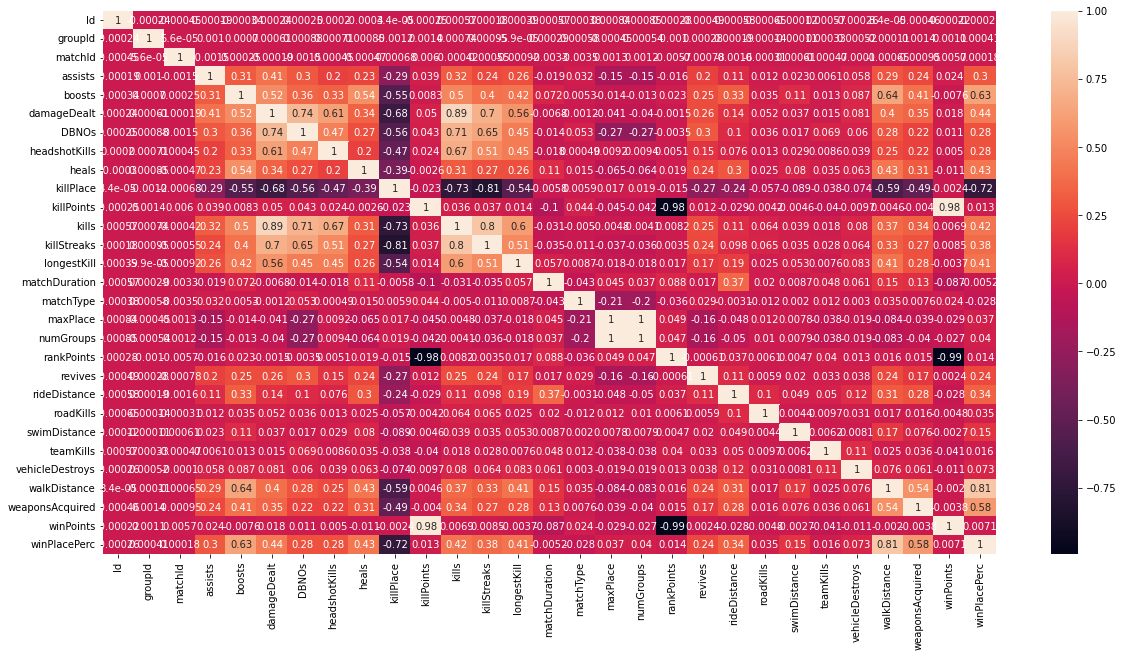

In [ ]:
fig=plt.figure(figsize=(20,10))
corrMatrix=data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
plt.close()

In [ ]:
X= data.drop(['winPlacePerc'],axis=1)
y = data['winPlacePerc']
Xt=data1.copy()

In [ ]:
lab=preprocessing.LabelEncoder()
y=lab.fit_transform(data['winPlacePerc'])

In [ ]:
PUBG_Model=HistGradientBoostingRegressor().fit(X,y)
ytest=PUBG_Model.predict(Xt)

In [ ]:
df= sample.copy()
df['winPlacePerc']=ytest

In [ ]:
df.loc[df.winPlacePerc >= 1, "winPlacePerc"] = 1
df.loc[df.winPlacePerc <= 0, "winPlacePerc"] = 0

In [ ]:
df.to_csv('/content/drive/MyDrive/data1 files/submission_final.csv', index=False)

In [ ]:
df

,Id,winPlacePerc
0,9329eb41e215eb,1.0
1,639bd0dcd7bda8,1.0
2,63d5c8ef8dfe91,1.0
3,cf5b81422591d1,1.0
4,ee6a295187ba21,1.0
...,...,...
1934169,a316c3a13887d5,1.0
1934170,5312146b27d875,1.0
1934171,fc8818b5b32ad3,1.0
1934172,a0f91e35f8458f,1.0


In [ ]:
df.head(10)

,Id,winPlacePerc
0,9329eb41e215eb,1.0
1,639bd0dcd7bda8,1.0
2,63d5c8ef8dfe91,1.0
3,cf5b81422591d1,1.0
4,ee6a295187ba21,1.0
5,3e2539b5d78183,1.0
6,d812d2f1d88a02,1.0
7,a8a377e4d43bf8,1.0
8,f18301e30d47d3,1.0
9,ec7b965ef978b3,1.0


In [ ]:
df.winPlacePerc.max()

1.0

In [ ]:
df.winPlacePerc.min()

0.0